# Cargar librerias

In [3]:
from keras.preprocessing.image import ImageDataGenerator #Para procesar imagenes
from tqdm import tqdm            #Para barras de progreso
import numpy as np               #Procesamiento de arrays
import matplotlib.pyplot as plt  #Para mostrar imagenes
from sklearn.cluster import MiniBatchKMeans   #Para utilizar kMeans
from sklearn.metrics import accuracy_score    #Para medir la precisión
from google.colab import drive  #Para cargar imagenes del Drive
import pickle #Para exportar el modelo
from PIL import Image #Para leer de url
import requests #Para leer de url
from io import BytesIO #Para leer de url

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


# Preparacion de Datos


In [5]:

path_imagenes = '/content/drive/My Drive/Machine Learning TP - Llanos-Lopez/Datasets/Imagenes/Figuras5' 
longitud, altura = 150, 150
batch_size = 1  #Cantidad a procesar por lote

In [6]:
##Preparamos las imagenes

datagen = ImageDataGenerator(rescale=1. / 255) #reescalamos

train_generator = datagen.flow_from_directory(
    path_imagenes,
    target_size=(altura, longitud),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical')


Found 760 images belonging to 5 classes.


(1, 150, 150, 1)


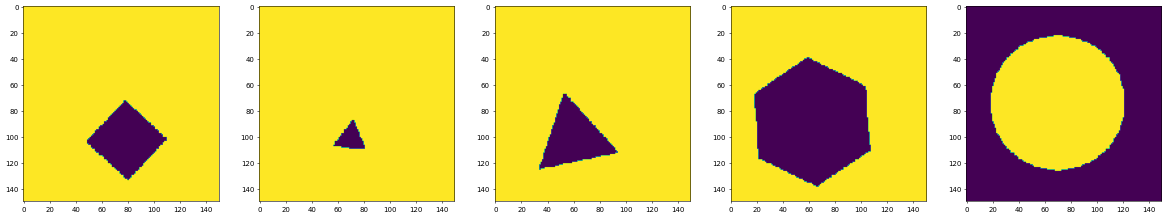

In [7]:
plt.figure(figsize = (50,30), dpi=50)
bottom = 0.35
index = 0
for i in range(5):  
    img, label = train_generator.next()
    index = index+1
    plt.subplots_adjust(bottom)
    plt.subplot(5,6,index)
    temp = img[0].reshape(len(img[0]),-1)
    plt.imshow(temp)
print(img.shape)

In [8]:
# Guarda los datos del generador en X_train e y_train al iterar sobre los lotes
train_generator.reset()
X_train, y_train = next(train_generator)
for i in tqdm(range(int(len(train_generator)/batch_size)-1)):
  img, label = next(train_generator)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

100%|██████████| 759/759 [01:51<00:00,  6.78it/s]

(760, 150, 150, 1) (760, 5)


In [9]:
print(X_train.shape)
X_train = X_train.reshape(len(X_train),-1) #Reducimos las dimensiones del arreglo para poder ser procesado por KMeans
print(X_train.shape)

(760, 150, 150, 1)
(760, 22500)


# Seleccion del Modelo

In [10]:
total_clusters= 5
kmeans = MiniBatchKMeans(n_clusters=total_clusters, init='k-means++', max_iter=100, batch_size=1024, verbose=0, compute_labels=True, random_state=None, tol=0.0, max_no_improvement=10, init_size=None, n_init=3, reassignment_ratio=0.01)

# Entrenamiento

In [11]:
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=5)

In [12]:
kmeans.labels_

array([2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 4, 0, 3, 3, 3, 3, 4, 0, 2, 2, 0, 1,
       0, 3, 2, 3, 2, 2, 0, 0, 3, 2, 2, 1, 0, 3, 2, 2, 1, 0, 3, 3, 1, 4,
       0, 3, 4, 0, 3, 3, 2, 3, 4, 0, 3, 2, 2, 3, 1, 2, 3, 2, 0, 0, 1, 3,
       0, 0, 1, 2, 3, 3, 0, 1, 1, 1, 2, 0, 1, 3, 2, 0, 0, 2, 2, 1, 4, 0,
       3, 0, 2, 0, 3, 1, 0, 0, 2, 2, 0, 3, 3, 1, 2, 3, 0, 3, 0, 0, 0, 2,
       0, 3, 2, 0, 3, 1, 4, 3, 1, 0, 2, 1, 0, 2, 3, 0, 0, 1, 4, 3, 2, 2,
       0, 0, 2, 0, 2, 3, 4, 0, 3, 4, 2, 3, 4, 2, 2, 1, 2, 0, 1, 3, 0, 0,
       1, 2, 0, 3, 3, 4, 3, 0, 1, 0, 2, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 3,
       0, 2, 0, 0, 2, 4, 4, 2, 2, 0, 2, 1, 0, 1, 3, 0, 2, 2, 2, 0, 1, 2,
       3, 0, 4, 3, 4, 0, 2, 2, 2, 3, 0, 0, 4, 2, 1, 3, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 4, 2, 1, 0, 2, 0, 0, 0, 3, 1, 3, 0, 2, 1, 2, 0, 3, 2, 3,
       2, 2, 2, 2, 3, 2, 4, 0, 2, 0, 0, 2, 2, 2, 1, 3, 4, 1, 1, 4, 2, 0,
       3, 4, 3, 4, 2, 1, 4, 2, 1, 1, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 4,
       3, 2, 2, 1, 2, 2, 0, 3, 0, 1, 2, 1, 2, 0, 4,

In [13]:
#Transformamos y_train a un formato mas facil de usar
lst = []
for i in range(len(y_train)):
  for j in range(len(y_train[i])):
    if y_train[i][j] == 1.0:
      lst.append(j)
arr = np.array(lst)
print(lst)

[2, 4, 3, 2, 1, 0, 3, 2, 2, 0, 1, 4, 1, 2, 2, 4, 4, 0, 4, 0, 2, 3, 1, 4, 1, 2, 1, 4, 3, 0, 4, 2, 0, 1, 4, 4, 1, 2, 4, 3, 0, 0, 2, 2, 2, 1, 4, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 2, 0, 2, 1, 2, 1, 1, 3, 3, 2, 0, 0, 2, 0, 1, 0, 4, 0, 3, 0, 3, 2, 4, 2, 3, 4, 3, 1, 3, 4, 2, 4, 2, 4, 4, 4, 1, 4, 1, 1, 4, 1, 3, 1, 3, 2, 0, 3, 4, 3, 0, 0, 1, 0, 3, 1, 3, 4, 3, 2, 0, 1, 0, 2, 0, 1, 4, 4, 0, 4, 3, 0, 1, 0, 1, 2, 2, 4, 4, 1, 2, 1, 1, 3, 0, 2, 0, 3, 3, 0, 1, 3, 1, 1, 2, 4, 1, 3, 3, 4, 0, 4, 1, 2, 0, 1, 2, 4, 4, 2, 3, 0, 4, 2, 3, 1, 2, 0, 0, 4, 3, 0, 3, 3, 0, 2, 1, 2, 4, 1, 1, 1, 4, 2, 4, 1, 3, 4, 3, 3, 0, 2, 4, 0, 4, 1, 2, 4, 4, 4, 4, 3, 3, 2, 2, 4, 3, 4, 4, 3, 4, 3, 0, 4, 0, 4, 4, 0, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 0, 2, 3, 0, 1, 1, 2, 0, 4, 1, 1, 3, 1, 4, 3, 3, 1, 4, 4, 1, 0, 0, 4, 1, 2, 0, 0, 3, 3, 3, 4, 1, 0, 2, 0, 0, 1, 3, 3, 0, 2, 3, 3, 3, 0, 0, 0, 2, 1, 1, 4, 1, 0, 3, 0, 4, 2, 2, 2, 1, 3, 3, 4, 1, 3, 2, 4, 4, 4, 1, 3, 2, 3, 2, 3, 2, 2, 1, 1, 2, 3, 0, 4, 0, 2, 4, 3, 0, 4, 1, 4, 0, 1, 1, 4, 2, 1, 2, 

In [14]:
#Funcion que calcula el label mas probable de un cluster
def retrieve_info(cluster_labels,y_train):
  reference_labels = {}
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [15]:
reference_labels = retrieve_info(kmeans.labels_,arr)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,arr))

0.22894736842105262


# Analisis de modelo

In [17]:
print(reference_labels)

{0: 3, 1: 3, 2: 1, 3: 2, 4: 2}


In [18]:
X_train.shape
X_train = X_train.reshape(760,150,150)
X_train.shape

(760, 150, 150)

In [19]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))


{0: 230, 1: 92, 2: 193, 3: 153, 4: 92}

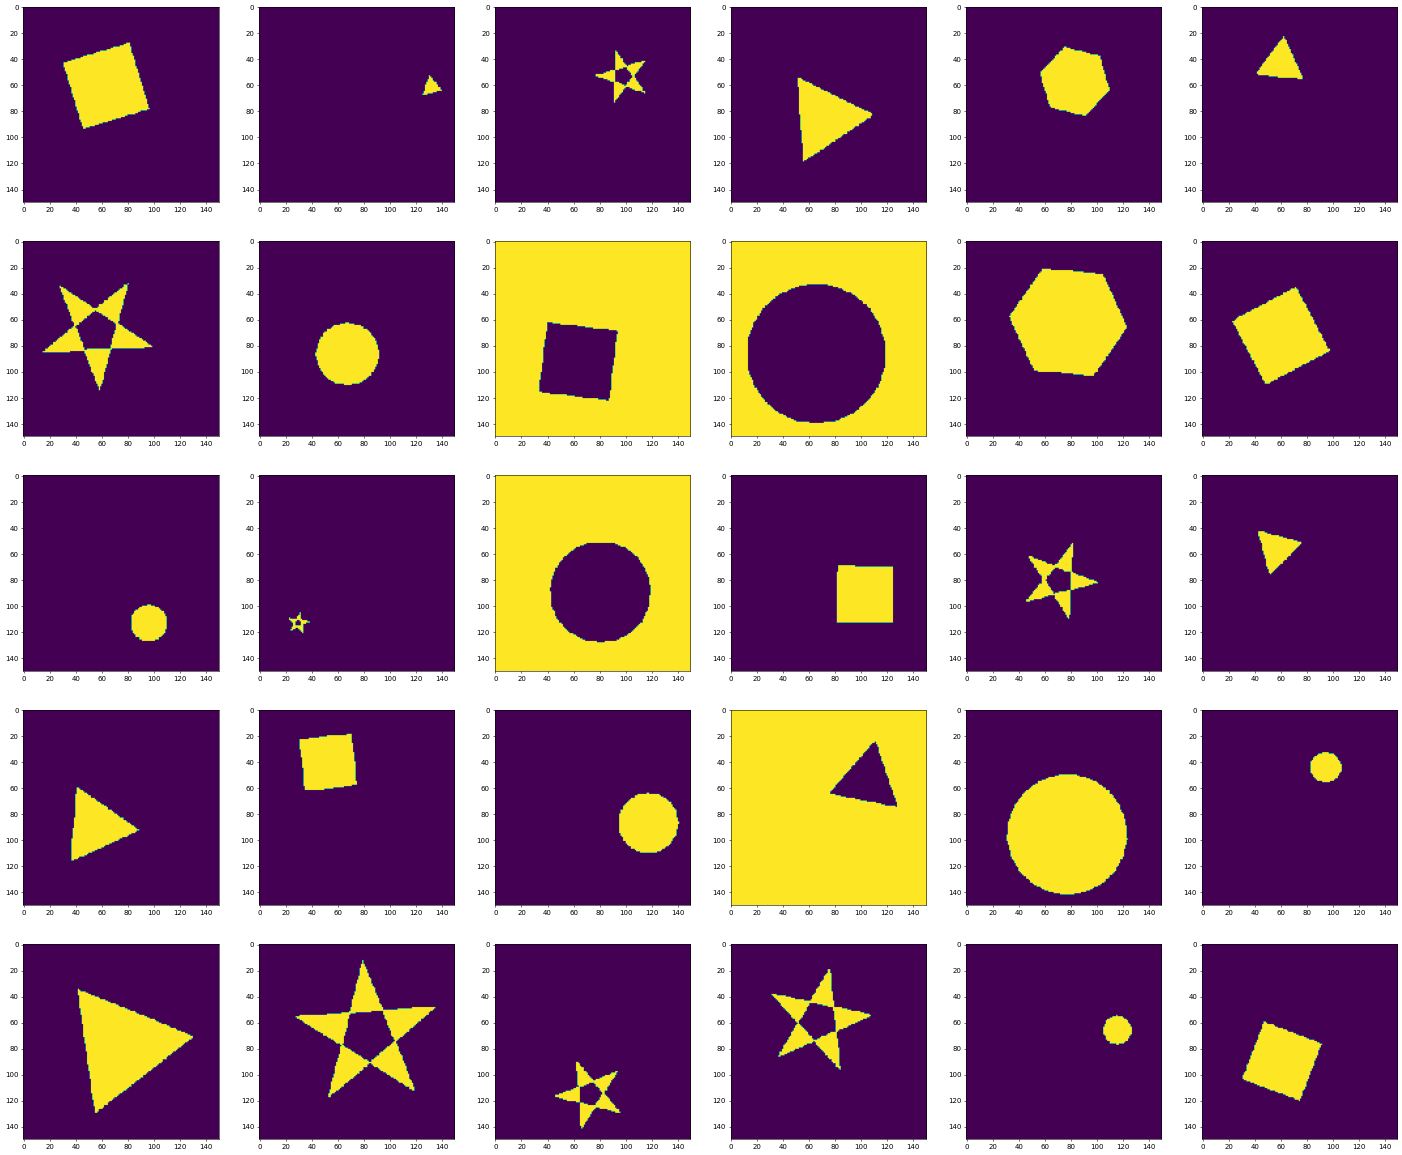

In [20]:
#Permite ver las imagenes que componen un cluster.
clusterAVer = 4
tipo_label = 0

if tipo_label == 0:
  label_origen = kmeans.labels_
elif tipo_label == 1:
  label_origen = lst

plt.figure(figsize = (50,30), dpi=50)
bottom = 0.35
index = 0
for i in range(760):
  if label_origen[i] == clusterAVer and index<30:
    index = index+1
    plt.subplots_adjust(bottom)
    plt.subplot(5,6,index)
    plt.imshow(X_train[i])

# Test de Centroides

In [21]:
centroids = kmeans.cluster_centers_

In [22]:

print (centroids.shape)
centroids = centroids.reshape(5,150,150)
print (centroids.shape)

(5, 22500)
(5, 150, 150)


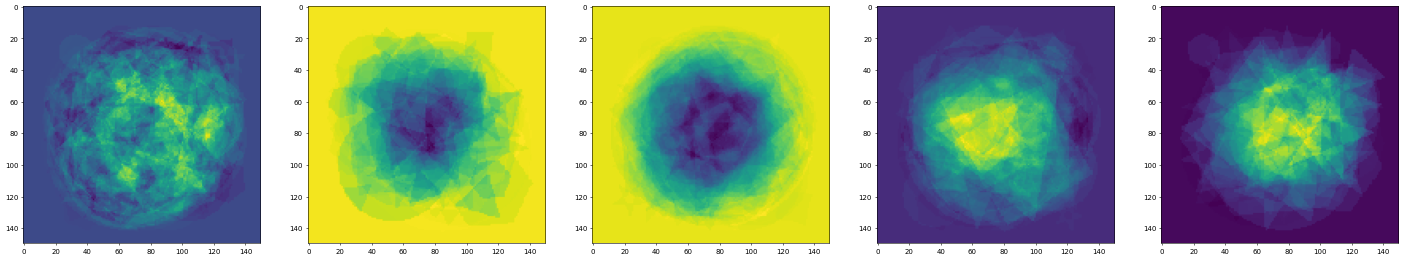

In [23]:

plt.figure(figsize = (50,30), dpi=50)
bottom = 0.35
for i in range(5):
 plt.subplots_adjust(bottom)
 plt.subplot(1,5,i+1)
 plt.imshow(centroids[i])